<a href="https://colab.research.google.com/github/hamagami/pycaret/blob/main/pycaret_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In [ ]:
!pip -q install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.6 MB/s et

In [ ]:
import pycaret

In [ ]:
#from pycaret.classification import * #分類
from pycaret.regression import *     #回帰
#from pycaret.clustering import *     #クラスタリング
#from pycaret.anomaly import *        #異常検知
#from pycaret.time_series import *    #時系列処理

In [ ]:
from pycaret.datasets import get_data #あらかじめ用意してくれている様々な練習用データセット

In [ ]:
get_data() #どのようなデータがあるか一覧

In [ ]:
dataset = get_data('bike') #bikeデータセットを取得

setup()　を使って前処理を行う。
いろいろ細かい指定もできるが，最低限の指定は，読みこんだデータセットのDataFrameとターゲットとなる属性（カラム名）の指定のみ。データの中をみて自動で処理をしてくれる。
あわせて，データの統計的性質や処理内容も確認できる。
このあとで学習につかうtrain用データセットと，評価につかうtest用データセットの分割や交差検証のためのfold数の指定も自動で行われる。
setup()を行うたびにtrain, testはランダムにサンプルされるが，再現性のある実験が必要な場合はsession_id で指定するとよい。
igunore_features は学習に含めない属性，他にもいろいろなオプションがある
https://qiita.com/tomiyou/items/e1842775e7aaee04ada3

Preprocessing is performed using setup(). Various details can be specified, but at a minimum, only the DataFrame of the loaded data set and the target attribute (column name) need to be specified. The system automatically processes the data by looking inside the data. In addition, the statistical properties of the data and the details of the processing can also be checked. After this, the data set for training and the data set for evaluation (train and test) are divided, and the number of folds for cross-validation is also specified automatically. Each time setup() is performed, train and test are sampled at random, but if you need repeatable experiments, you can specify the session_id. igunore_features is an attribute that is not included in the training, and there are various other options. see https://qiita.com/tomiyou/items/e1842775e7aaee04ada3


In [ ]:
setupdata = setup(dataset, target ="cnt",ignore_features=["instant","dteday"],session_id=123) #データの前処理

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 13)"
5,Transformed train set shape,"(12165, 13)"
6,Transformed test set shape,"(5214, 13)"
7,Ignore features,2
8,Numeric features,12
9,Preprocess,True


setup等で出力されるサマリ―はpull()によって取り出すことができる

Summaries output by setup, etc. can be retrieved by pull()

In [ ]:
pull()

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 13)"
5,Transformed train set shape,"(12165, 13)"
6,Transformed test set shape,"(5214, 13)"
7,Ignore features,2
8,Numeric features,12
9,Preprocess,True


setup後のデータや様々な処理を確認するには，get_config()を使う
なにも指定せず，get_config()とだけ実行すると，確認可能な属性一覧が得られる。例えばgetconfig("data")とすると，オリジナルのデータセットが，get_config("dataset_trainsformed")とすると前処理後のデータが得られる。

Use get_config() to check the data after setup and various processes
If you execute get_config() without specifying anything, you will get a list of attributes that can be checked. For example, getconfig("data") will give you the original dataset, and get_config("dataset_trainsformed") will give you the data after preprocessing.

In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config("dataset_transformed")

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
1859,2.0,0.0,3.0,6.0,0.0,3.0,1.0,2.0,0.34,0.3182,0.87,0.2537,44
7302,4.0,0.0,11.0,21.0,0.0,6.0,0.0,1.0,0.32,0.3485,0.66,0.0000,118
17094,4.0,1.0,12.0,1.0,0.0,4.0,1.0,1.0,0.32,0.3485,0.66,0.0000,20
17009,4.0,1.0,12.0,12.0,0.0,0.0,0.0,2.0,0.38,0.3939,0.82,0.1940,417
1636,1.0,0.0,3.0,17.0,0.0,0.0,0.0,1.0,0.44,0.4394,0.41,0.3582,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,0.16,0.1364,0.43,0.3284,41
2179,2.0,0.0,4.0,16.0,0.0,2.0,1.0,1.0,0.38,0.3939,0.46,0.4179,130
12351,2.0,1.0,6.0,20.0,0.0,0.0,0.0,1.0,0.66,0.6212,0.39,0.1940,314
1846,2.0,0.0,3.0,16.0,0.0,2.0,1.0,1.0,0.50,0.4848,0.42,0.1045,165


ここですぐ特定の学習方法（アルゴリズム）をつかってモデルをつくることもできるが，pycaretでは，compare_models()をつかって，複数のアルゴリズムを試して比較をすることができる。ただし，ここでの評価は比較的簡易的な規模で交差検証も行わっていないため，結果の優劣は必ずしも厳密ではないことに注意（わずかな違いは試行の度の初期値の違いにより逆転する）。出力は良い解が上位にくる。戻り値にはbestのモデルのインスタンスが入る。
比較できるモデルは models()でみることができる。compare_models()で試されるアルゴリズムはその中の一部になっておりすべてのモデルを試すわけではない。ディフォルトで試さないモデルについては，includeオプションで明示的に指定できる。

While it is possible to create a model using a specific learning method (algorithm) right away, pycaret allows you to try multiple algorithms for comparison using compare_models(). Note, however, that the evaluation here is relatively simple and not cross-validated, so the results are not necessarily exact (small differences can be reversed due to differences in the initial values for each trial). The output is the best solution at the top of the list. The return value is an instance of the best model.
Models that can be compared can be seen in models(); the algorithm tried in compare_models() is only a subset of that and not all models are tried. Models not tested by default can be specified explicitly with the include option.

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
the_bestmodel=compare_models() #ディフォルトのアルゴリズム間で比較

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,26.6137,1807.5006,42.4572,0.9446,0.4210,0.4221,1.0910
et,Extra Trees Regressor,26.0132,1831.7017,42.6846,0.9439,0.3474,0.3218,2.6930
xgboost,Extreme Gradient Boosting,26.8283,1840.9324,42.8237,0.9436,0.4569,0.4380,0.1610
rf,Random Forest Regressor,26.5309,1958.5411,44.1677,0.9401,0.3540,0.3273,3.9650
knn,K Neighbors Regressor,35.8729,3227.5435,56.7379,0.9012,0.4122,0.4261,0.0770
dt,Decision Tree Regressor,35.7347,3597.0725,59.7623,0.8900,0.4591,0.3910,0.0690
gbr,Gradient Boosting Regressor,47.8208,4944.5863,70.2541,0.8482,0.6820,0.9764,0.8060
ada,AdaBoost Regressor,85.1763,10990.4103,104.8078,0.6627,1.0645,2.7201,0.8720
br,Bayesian Ridge,105.0383,19833.0200,140.7902,0.3922,1.2112,3.3582,0.0430
ridge,Ridge Regression,105.0407,19832.7554,140.7891,0.3922,1.2111,3.3584,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
the_bestmodel=compare_models(include=["lightgbm","et","xgboost"]) #　lightgbmと et と xgboost で比較する。

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,26.6137,1807.5006,42.4572,0.9446,0.4210,0.4221,1.4300
et,Extra Trees Regressor,26.0132,1831.7017,42.6846,0.9439,0.3474,0.3218,2.8650
xgboost,Extreme Gradient Boosting,26.8283,1840.9324,42.8237,0.9436,0.4569,0.4380,0.1900


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

もっともよかったモデルのハイパーパラメータ等は戻り値をみるとわかる。
ただし，これはディフォルトの値であり，このハイパーパラメータが最良かどうかはここではわからない

The hyperparameters of the best model can be seen in the return values.
Note that these are default values, and we cannot tell if this hyperparameter is the best or not.

In [ ]:
the_bestmodel #もっともよかったモデルのパラメータ等を表示する

LGBMRegressor(n_jobs=-1, random_state=123)

なんとなくよいモデルがわかってきたところで本格的な学習を行う。ここではlightgbmが最もよかったとしてlightgbmのモデルに特化して学習をする。setupで10Foldの検証をするように指定をしているためその指定に従って学習が行われる

Once a suitable model has been identified, full-scale training is performed. Here, assuming that lightgbm is the best model, we will specialize in learning the lightgbm model. 10Fold validation is specified in the setup, so learning is performed according to that specification.

In [ ]:
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.0981,1894.7280,43.5285,0.9395,0.4124,0.4330
1,26.0121,1699.5222,41.2253,0.9490,0.4043,0.4056
2,26.9860,1763.8803,41.9986,0.9472,0.4259,0.4267
3,26.8598,1864.0055,43.1741,0.9438,0.4101,0.4093
4,24.4458,1388.7436,37.2659,0.9530,0.4229,0.4211
5,26.4849,1823.8032,42.7060,0.9432,0.4230,0.4009
6,27.4870,2115.8016,45.9978,0.9371,0.4173,0.4081
7,25.6768,1706.3817,41.3084,0.9516,0.4349,0.4576
8,27.5165,1988.0522,44.5876,0.9375,0.4432,0.4546


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

一通りの学習が終わったところで，ハイパーパラメータのチューニングを行う。この処理は結構時間がかかることがある

After all the learning is done, the hyperparameters are tuned. This process can take quite a while.

In [ ]:
tuned_lightgbm_model = tune_model(lightgbm_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.3341,1828.3953,42.7597,0.9417,0.5421,0.6978
1,28.6891,1863.7287,43.1709,0.9441,0.5139,0.6165
2,28.3411,1712.4372,41.3816,0.9487,0.5268,0.6332
3,29.1502,1971.5435,44.4021,0.9406,0.5040,0.5906
4,26.6063,1502.1327,38.7574,0.9492,0.5413,0.6655
5,28.4925,1902.1712,43.6139,0.9408,0.5360,0.5926
6,30.4423,2374.7083,48.7310,0.9294,0.5158,0.6162
7,28.2442,1859.3089,43.1197,0.9473,0.5335,0.6192
8,29.6925,2045.3376,45.2254,0.9357,0.5524,0.6094


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
finalized_lightgbm_model = finalize_model(tuned_lightgbm_model)#テストデータを含めた最終的な学習

In [ ]:
predict_model(finalized_lightgbm_model)#テストデータに対する評価

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,23.3581,1289.7420,35.9130,0.9614,0.3821,0.3713


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,299.667335
7823,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,379.557230
15426,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,107.026738
15028,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,249.755241
12290,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,395.934512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1,0,1,19,0,0,0,1,0.16,0.1364,0.43,0.3284,41,51.358276
2179,2,0,4,16,0,2,1,1,0.38,0.3939,0.46,0.4179,130,145.524947
12351,2,1,6,20,0,0,0,1,0.66,0.6212,0.39,0.1940,314,335.880955
1846,2,0,3,16,0,2,1,1,0.50,0.4848,0.42,0.1045,165,207.047048


In [ ]:
pred = predict_model(finalized_lightgbm_model,data=get_config("X_test")) #新規データに対する評価　ここではテストデータを未知のデータとみたてて出力させている

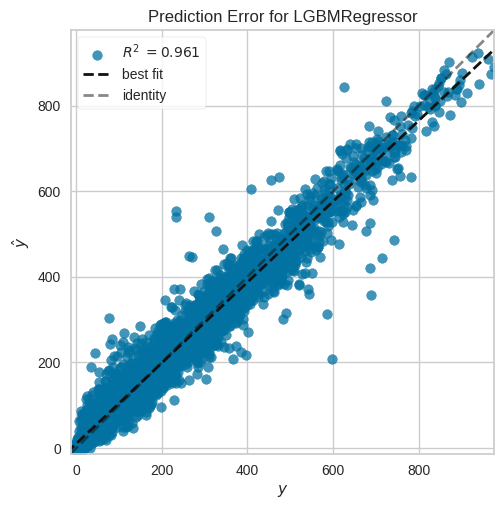

In [ ]:
plot_model(finalized_lightgbm_model,plot="error")

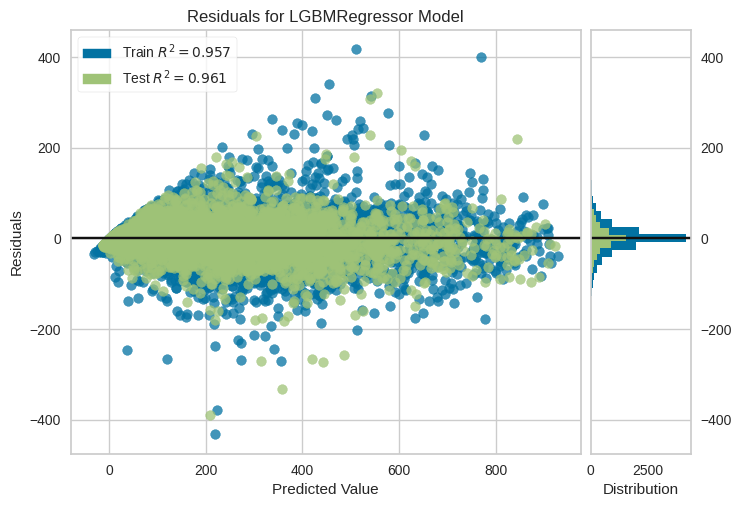

In [ ]:
plot_model(finalized_lightgbm_model,plot="residuals")

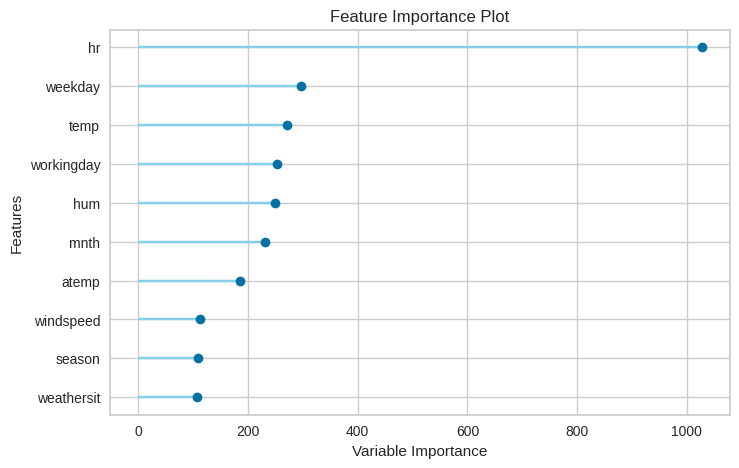

In [ ]:
plot_model(finalized_lightgbm_model,plot="feature")

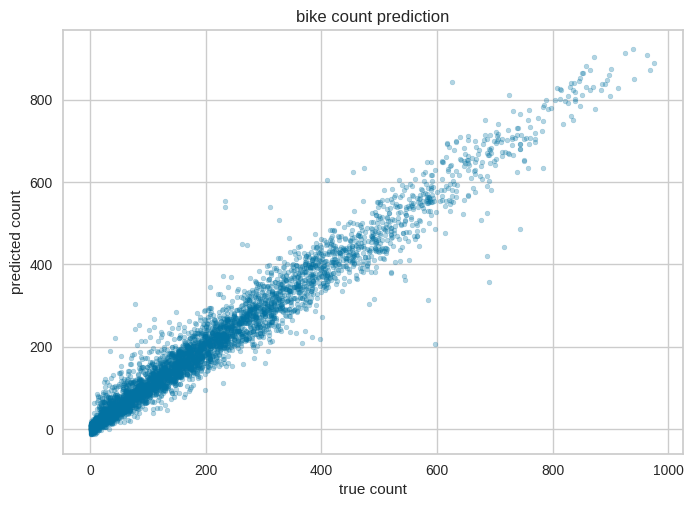

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(get_config("y_test"),pred["prediction_label"],marker=".",alpha=0.3)
plt.xlabel("true count")
plt.ylabel("predicted count")
plt.title("bike count prediction")
plt.show()

In [ ]:
fn="bike_learned_lightgbm_model.pcm"
save_model(finalized_lightgbm_model,fn)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit', 'temp', 'atemp',
                                              'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  LGBMRegressor(n_jobs=-1, random_state=123))]),
 'bike_learned_lightgbm_model.pcm.pkl')

In [ ]:
ld_model = load_model(fn)

Transformation Pipeline and Model Successfully Loaded


In [ ]:
ld_model.predict(get_config("X_test"))

array([299.66733499, 379.55722969, 107.02673763, ..., 335.88095484,
       207.04704763, 182.82245268])

In [ ]:
pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,23.3581,1289.742,35.913,0.9614,0.3821,0.3713
